# 전처리한 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# train.csv : 훈련용
# test.csv : 테스트용 -> 예측해서 제출
# sample_sub...csv : 제출용
import os

path = '/content/drive/MyDrive/DAS Final Project/Data'
train = pd.read_csv( os.path.join(path,'bank_train.csv'), index_col='id' )
test  = pd.read_csv( os.path.join(path,'bank_test.csv'), index_col='id' )
submission = pd.read_csv( os.path.join(path,'sample_submission.csv') )

display( train.head(1)) # 0 ~ 165033
display( test.head(1)) # 165034 ~
display( submission.head(1) ) # 0 혹은 1일 확률(predict_proba())을 제시-> 기입 -> 제출

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,
0,15674932,668,33.0,3,0.0,2,1.0,0.0,181449.97,0


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,
165034,15773898,586,23.0,2,0.0,2,0.0,1.0,160976.75


,id,Exited
0,165034,0.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 피처엔지니어링

## 피처 요약표 제작

In [ ]:
# 결측치 수 계산
# True, False => sum() => 1, 0 치환되서 처리

train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# 고유값 수 계산
train.nunique()

CustomerId         23221
CreditScore          457
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

In [ ]:
def summary_feature_info( df ):
    '''
        주어진 df로 부터 피처별 요약된 정보 생성 제공
    '''
    # 타입을 데이터로 기본 구성
    summary_df = pd.DataFrame( df.dtypes, columns=['타입'])
    summary_df.reset_index(inplace=True) # 인덱스 -> 컬럼으로 이동
    summary_df.rename( columns={'index':'feature'}, inplace=True) # 컬럼명 변경
    #결측치수
    summary_df['결측치수'] = df.isnull().sum().values
    # 고유값수
    summary_df['고유값수'] = df.nunique().values
    # 샘플함수를 이용 추출후 하나씩 적용해도 관계 없음
    # 샘플값_0
    summary_df['샘플값_0'] = df.iloc[0].values
    # 샘플값_1
    summary_df['샘플값_1'] = df.iloc[1].values
    # 샘플값_2
    summary_df['샘플값_2'] = df.iloc[2].values
    return summary_df


# 피처요약표 생성
summary_feature_info( train )

,feature,타입,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,CustomerId,int64,0,23221,15674932.00,15749177.0,15694510.00
1,CreditScore,int64,0,457,668.00,627.0,678.00
2,Age,float64,0,71,33.00,33.0,40.00
3,Tenure,int64,0,11,3.00,1.0,10.00
4,Balance,float64,0,30075,0.00,0.0,0.00
5,NumOfProducts,int64,0,4,2.00,2.0,2.00
6,HasCrCard,float64,0,2,1.00,1.0,1.00
7,IsActiveMember,float64,0,2,0.00,1.0,0.00
8,EstimatedSalary,float64,0,55298,181449.97,49503.5,184866.69
9,Exited,int64,0,2,0.00,0.0,0.00


## 피처엔지니어링 계획수립

- 모두 수치형이므로 스케일링만 하는 것으로 -> 추후 성능개선시
- Target = train 데이터의 Exited



## 일단 모델 구축

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

features = train.columns.values.tolist()
features.remove('Exited')
print(features)

# Splitting the training data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(train[features], train['Exited'], test_size=0.2, random_state=0) # 90% training and 10% test

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 M

In [ ]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade -q xgboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 알고리즘 생성
model = RandomForestClassifier()
# 학습
model.fit(X_train, y_train)
# 예측 및 평가 -> 정확도
accuracy_score( y_test, model.predict(X_test) )

0.8521525736964887

## 피처스케일링

### 수치형 데이터 스케일링(MinMax)

- CreditScore
- Age
- Balance

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Train, Test 데이터를 합한 데이터에서 최댓값과 최솟값을 이용하기 위해 수동 스케일링 함수 제작
def scale_data(train, test, column):
    scaler = MinMaxScaler()
    max_value = max(train[column].values.max(), test[column].values.max())
    min_value = min(train[column].values.min(), test[column].values.min())

    train[column] = (train[column] - min_value)/(max_value - min_value)
    test[column] = (test[column] - min_value)/(max_value - min_value)

    return train, test

for column in scale_columns:
    train, test = scale_data(train, test, column)

# 모델링

## 알고리즘 선정

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_curve, auc

In [ ]:
als = {
    # '키:알고리즘명':(알고리즘객체, 선의 모양)
    'LogisticRegression'    :( LogisticRegression(), '-'),
    'DecisionTreeClassifier':( DecisionTreeClassifier(max_depth=5), '--'),
    'RandomForestClassifier':( RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10), '.-'),
    'XGBoost'               :( XGBClassifier(), ':'),
    'LGBMClassifier'        :( LGBMClassifier(), '--'),
    'CatBoostClassifier'    :( CatBoostClassifier(), '.-')
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.6054600255889557
DecisionTreeClassifier 0.8680481937151671
RandomForestClassifier 0.8410707282264186
XGBoost 0.8736599049792404
[LightGBM] [Info] Number of positive: 28002, number of negative: 104025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212093 -> initscore=-1.312355
[LightGBM] [Info] Start training from score -1.312355
LGBMClassifier 0.8760147345467167
Learning rate set to 0.082881
0:	learn: 0.6182955	total: 119ms	remaining: 1m 58s
1:	learn: 0.5592182	total: 200ms	remaining: 1m 39s
2:	learn: 0.5136036	total: 268ms	remaining: 1m 29s
3:	learn: 0.4784891	total: 335ms	remaining: 1m 23s
4:	learn: 0.4523161	tota

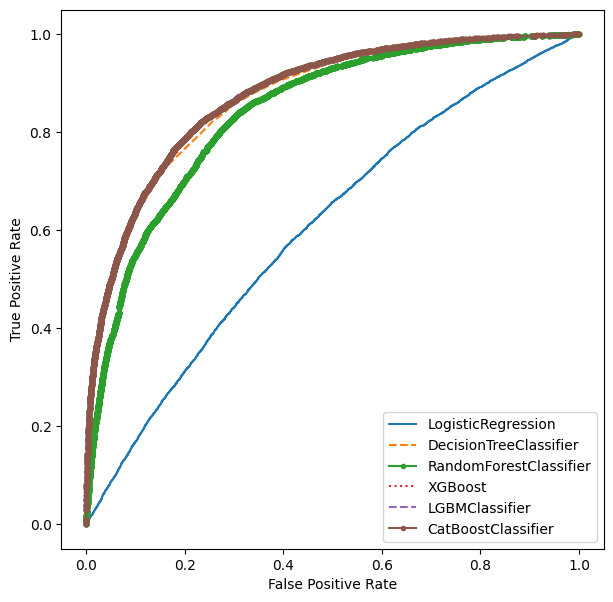

In [ ]:
# 차트 모양
plt.figure( figsize=(7,7))

# 반복
for al_nm, ( model, line_style ) in als.items(): # 알고리즘 이름, 알고리즘객체, 선의 모양
    # 학습
    model.fit( X_train, y_train ) # 학습수행-> 데이터를 경험했다
    # 예측 : [ F 예측확률, T 예측확률 ]
    pred = model.predict_proba( X_test ) # 학습에 사용하지 않은 데이터->한번도 접하지 않은..
    #print( pred )
    # T를 예측한 확률만(1로 판정한 확률만) 추출
    pred_t = pred[ :, -1]
    # 성능평가
    # roc_curve(실제정답, T를예측한확률점수)
    fpr, tpr, _ = roc_curve(y_test.values, pred_t, )
    # 차트그리기 - 플로팅
    plt.plot( fpr, tpr, line_style, label=al_nm)
    # 곡선하면적 계산 제공
    print( al_nm, auc(fpr, tpr))
    #break
    pass

# 데코
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 화면출력
plt.show()

## ROC curve 시각화 함수

In [ ]:
from sklearn import metrics

# 각 모델의 accuracy, log_loss, auc를 print하는 함수
def print_results(classifier_name, y_test, y_pred, y_pred_proba, fpr, tpr):
    print('Train/Test split results:')
    print(classifier_name + " accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
    print(classifier_name + " log_loss is %2.3f" % metrics.log_loss(y_test, y_pred_proba))
    print(classifier_name + " auc is %2.3f" % metrics.auc(fpr, tpr))

# ROC curve 시각화 함수
def plot_roc_curve(fpr, tpr, classifier_name):
    idx = np.min(np.where(tpr > 0.95))
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.7f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(classifier_name + ' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

results = []
# 각 모델의 accuracy, log_loss 및 auc를 저장하는 함수
def save_accuracy(classifier_name, accuracy, log_loss, auc):
    results.append([classifier_name, accuracy, log_loss, auc])

# 차트
def plot_results():
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Log Loss', 'AUC'])
    df_results = df_results.sort_values(by=['Accuracy'], ascending=False)
    df_results = df_results.reset_index(drop=True)
    scaler = MinMaxScaler()
    df_results['Log Loss'] = scaler.fit_transform(df_results['Log Loss'].values.reshape(-1, 1))
    df_results.rename(columns={'Log Loss': 'Log Loss (Normalized)'}, inplace=True)
    df_results.head()
    df_results_sorted = df_results.sort_values(by='AUC')

    bar_width = 0.25
    pos = np.arange(len(df_results_sorted['Model']))
    plt.figure(figsize=(12, 6))
    plt.bar(pos, df_results_sorted['Accuracy'], color='steelblue', width=bar_width, label='Accuracy')
    plt.bar(pos + bar_width, df_results_sorted['Log Loss (Normalized)'], color='limegreen', width=bar_width, label='Log Loss (Normalized)')

    # AUC 그래프 표시
    plt.bar(pos + 2*bar_width, df_results_sorted['AUC'], color='orange', width=bar_width, label='AUC')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance')
    plt.xticks(pos + bar_width, df_results_sorted['Model'], rotation=90)
    plt.ylim(0, 1)
    plt.legend()

    for i, auc in enumerate(df_results_sorted['AUC']):
        plt.annotate(f'{auc:.7f}',
                    xy=(pos[i] + 2*bar_width, auc),
                    xytext=(5, 5),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    rotation=90)

    plt.tight_layout()
    plt.show()

### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-16-2a5780b5c523>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
<ipython-input-16-2a5780b5c523>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]],

Train/Test split results:
Logistic Regression accuracy is 0.790
Logistic Regression log_loss is 0.503
Logistic Regression auc is 0.605


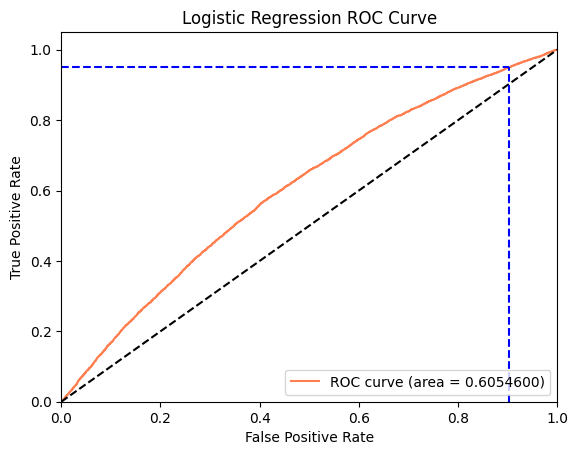

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("Logistic Regression", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "Logistic Regression")
save_accuracy("Logistic Regression", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

### Decision Tree

Train/Test split results:
Decision Tree accuracy is 0.787
Decision Tree log_loss is 7.671
Decision Tree auc is 0.682


<ipython-input-16-2a5780b5c523>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
<ipython-input-16-2a5780b5c523>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


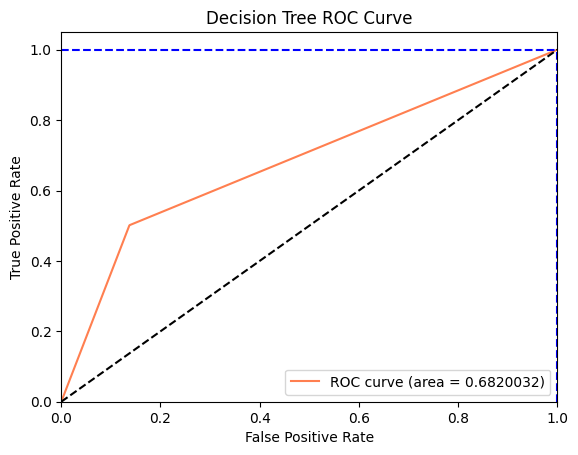

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("Decision Tree", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "Decision Tree")
save_accuracy("Decision Tree", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

### RandomForest

Train/Test split results:
Random Forest accuracy is 0.853
Random Forest log_loss is 0.354
Random Forest auc is 0.865


<ipython-input-16-2a5780b5c523>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
<ipython-input-16-2a5780b5c523>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


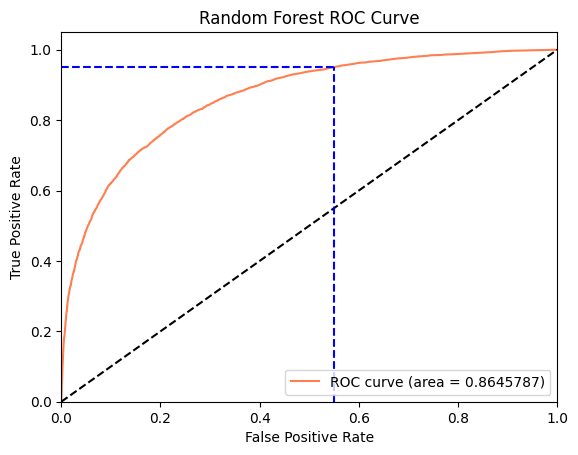

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("Random Forest", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "Random Forest")
save_accuracy("Random Forest", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

### XGBoost

Train/Test split results:
XGBoost accuracy is 0.852
XGBoost log_loss is 0.339
XGBoost auc is 0.874


<ipython-input-16-2a5780b5c523>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
<ipython-input-16-2a5780b5c523>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


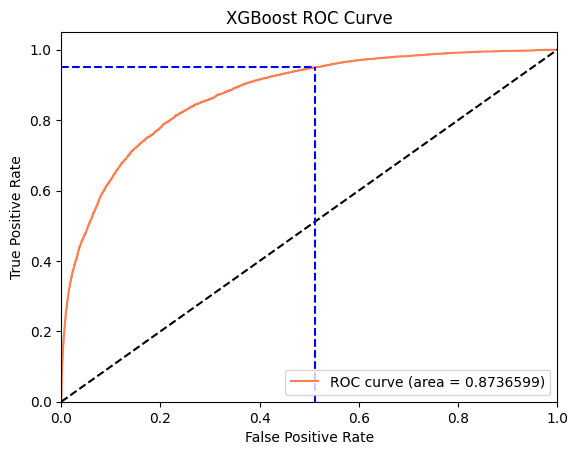

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("XGBoost", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "XGBoost")
save_accuracy("XGBoost", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

### LightGBM

[LightGBM] [Info] Number of positive: 28002, number of negative: 104025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212093 -> initscore=-1.312355
[LightGBM] [Info] Start training from score -1.312355
Train/Test split results:
LightGBM accuracy is 0.854
LightGBM log_loss is 0.336
LightGBM auc is 0.876


<ipython-input-16-2a5780b5c523>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
<ipython-input-16-2a5780b5c523>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


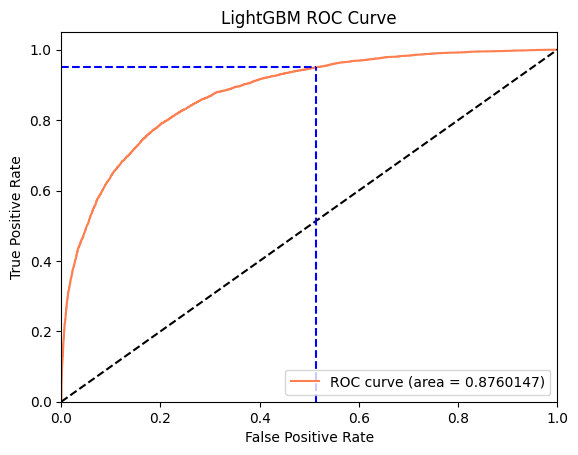

In [ ]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
y_pred_proba = lgb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("LightGBM", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "LightGBM")
save_accuracy("LightGBM", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

### CatBoost

0:	total: 32ms	remaining: 1m 51s
1:	total: 58.6ms	remaining: 1m 42s
2:	total: 85.1ms	remaining: 1m 39s
3:	total: 119ms	remaining: 1m 43s
4:	total: 163ms	remaining: 1m 53s
5:	total: 191ms	remaining: 1m 51s
6:	total: 218ms	remaining: 1m 49s
7:	total: 250ms	remaining: 1m 49s
8:	total: 280ms	remaining: 1m 48s
9:	total: 308ms	remaining: 1m 47s
10:	total: 347ms	remaining: 1m 49s
11:	total: 377ms	remaining: 1m 49s
12:	total: 404ms	remaining: 1m 48s
13:	total: 434ms	remaining: 1m 48s
14:	total: 468ms	remaining: 1m 48s
15:	total: 492ms	remaining: 1m 47s
16:	total: 518ms	remaining: 1m 46s
17:	total: 546ms	remaining: 1m 45s
18:	total: 573ms	remaining: 1m 45s
19:	total: 600ms	remaining: 1m 44s
20:	total: 628ms	remaining: 1m 44s
21:	total: 658ms	remaining: 1m 44s
22:	total: 689ms	remaining: 1m 44s
23:	total: 717ms	remaining: 1m 43s
24:	total: 745ms	remaining: 1m 43s
25:	total: 769ms	remaining: 1m 42s
26:	total: 797ms	remaining: 1m 42s
27:	total: 828ms	remaining: 1m 42s
28:	total: 856ms	remaining: 1

<ipython-input-16-2a5780b5c523>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
<ipython-input-16-2a5780b5c523>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


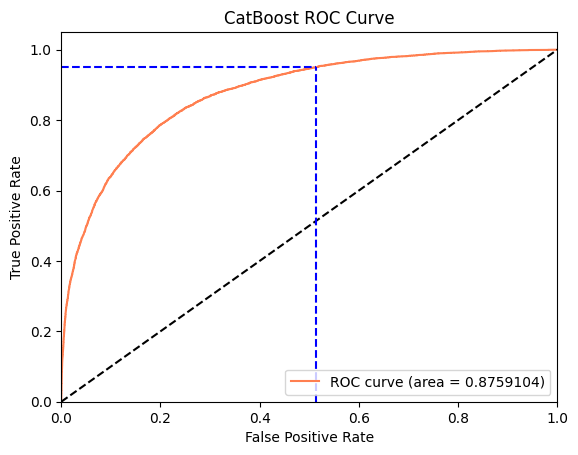

In [ ]:
cat = CatBoostClassifier(eval_metric = 'AUC',learning_rate = 0.0025, iterations= 3500)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("CatBoost", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "CatBoost")
save_accuracy("CatBoost", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

# 성능 개선

## 피처엔지니어링 2

## 최적화

### 하이퍼파라미터 튜닝

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

params = {
    'n_estimators' : [100, 500 , 1000] , # 반복 횟수
    'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
    'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
    'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
}

CPU times: user 704 ms, sys: 78.5 ms, total: 783 ms
Wall time: 1.1 s


In [ ]:
# 그리드서치 객체 생성
gridsearch_lgbm_model = GridSearchCV(estimator=lgbm,
                                     param_grid=params,
                                     scoring='roc_auc', # 평가지표
                                     cv=5)
# 그리드서치 수행
gridsearch_lgbm_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_lgbm_model.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### 오버피팅/언더피팅 방지

# 모델 적용 후 저장

## 검증

In [ ]:
from sklearn.metrics import roc_auc_score

y_test_preds = gridsearch_lgbm_model.predict_proba(X_test)[:, 1]

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_test, y_test_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

In [ ]:

# 타깃값 1일 확률 예측
lgbm_tune = LGBMClassifier(n_estimators = 1000 ,max_depth = 10, subsample = 0.6, learning_rate = 0.01)
lgbm_tune.fit(X_train,y_train)
y_preds = lgbm_tune.predict_proba(test[features])[:, 1]

# 제출 데이터 수정
submission['Exited'] = y_preds

# 캐글에 제출할 파일 생성
submission.to_csv('ml_submission_v1_20240403.csv', index=False)

# 결론